In [1]:
import math
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from train import *
from model import Gcn
from utils import load_cora

In [2]:
dataset = load_cora()
adj, features, labels, idx_train, idx_val, idx_test = dataset

Loading cora dataset...


In [3]:
# Network parameters
hidden_size = 16
dropout = 0.2

# Train parameters (Adam optimizer is used)
epochs = 400
lr = 0.003

In [8]:
# no skip connections
no_skip_test_results = []
no_skip_train_history = []

for i in range(6):
    model = Gcn(nfeatures=features.shape[1],
                nhidden_layers=i,
                hidden_size= hidden_size,
                nclasses=labels.max().item() + 1,
                dropout=dropout)
    
    if torch.cuda.is_available():
        dataset = [x.cuda() for x in dataset]
        model = model.cuda()

    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    current_losses = train(model, dataset,optimizer, epochs)
    no_skip_train_history.append(current_losses)
    no_skip_test_results.append(test(model, dataset))

In [22]:
# skip connections
skip_test_results = []
skip_train_history = []

for i in range(6):
    model = Gcn(nfeatures=features.shape[1],
                nhidden_layers=i,
                hidden_size= hidden_size,
                nclasses=labels.max().item() + 1,
                dropout=dropout,
                use_skip_connection=True)
    
    if torch.cuda.is_available():
        dataset = [x.cuda() for x in dataset]
        model = model.cuda()

    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    current_losses = train(model, dataset,optimizer, epochs)
    skip_train_history.append(current_losses)
    skip_test_results.append(test(model, dataset))

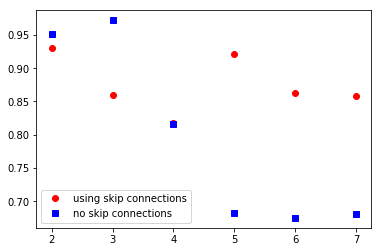

In [32]:
plt.plot(range(2, 8), skip_test_results, 'ro', label ="using skip connections")
plt.plot(range(2, 8), no_skip_test_results, 'bs', label ="no skip connections")
plt.legend(loc='lower left')
plt.show()